In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path="/content/drive/MyDrive/neveda_test/neveda_test/images"
#test_path="rps-final-dataset/test"
val_path="/content/drive/MyDrive/neveda_test/neveda_test/eval"

In [3]:
#img_res=load_image("/content/drive/MyDrive/test/Data/train/Incomplete/image_1.png")

In [4]:
def load_image(image_path):
  img_arr=cv2.imread(image_path)
  img_arr=cv2.resize(img_arr,(224,224))
  res=np.array(img_arr)
  res=res/255.0
  return img_arr

In [5]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)


x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [6]:
#res=np.array(img_res)


In [7]:
train_x=np.array(x_train)
#test_x=np.array(x_test)
val_x=np.array(x_val)

In [8]:
train_x=train_x/255.0
#test_x=test_x/255.0
val_x=val_x/255.0

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
#test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 300 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
train_y=training_set.classes
#test_y=test_set.classes
val_y=val_set.classes

In [12]:
training_set.class_indices

{'black': 0, 'white': 1}

In [13]:
train_y.shape,val_y.shape

((300,), (200,))

In [14]:
IMAGE_SIZE=[224, 224]

In [15]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


In [16]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False


In [17]:
x = Flatten()(vgg.output)

In [18]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [22]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=18,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/18
10/10 [==============================] - 11s 256ms/step - loss: 1.4361 - accuracy: 0.4900 - val_loss: 1.5515 - val_accuracy: 0.3000
Epoch 2/18
10/10 [==============================] - 1s 150ms/step - loss: 0.6931 - accuracy: 0.6667 - val_loss: 1.9900 - val_accuracy: 0.2000
Epoch 3/18
10/10 [==============================] - 1s 152ms/step - loss: 0.3366 - accuracy: 0.8500 - val_loss: 2.2426 - val_accuracy: 0.1200
Epoch 4/18
10/10 [==============================] - 1s 152ms/step - loss: 0.2205 - accuracy: 0.9267 - val_loss: 2.3594 - val_accuracy: 0.1100
Epoch 5/18
10/10 [==============================] - 1s 151ms/step - loss: 0.1900 - accuracy: 0.9533 - val_loss: 2.5664 - val_accuracy: 0.1300
Epoch 6/18
10/10 [==============================] - 1s 151ms/step - loss: 0.1517 - accuracy: 0.9567 - val_loss: 2.6815 - val_accuracy: 0.1000
Epoch 6: early stopping


In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

#plt.savefig('vgg-acc-rps-1.png')

plt.show()


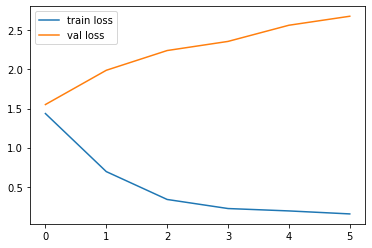

In [24]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [25]:
model.save('/content/drive/MyDrive/test/Data/vgg_model1_good.h5')

In [ ]:
model.save_weights('/content/drive/MyDrive/test/Data/vgg_model_good.h5',overwrite=True)

In [ ]:
model1='/content/drive/MyDrive/test/Data/vggmodel.h5'
model2='/content/drive/MyDrive/test/Data/model.h5'

In [ ]:
img_res.shape

(224, 224, 3)

In [ ]:
y_pred=model.predict(res)

In [ ]:
test_path="/content/drive/MyDrive/test/Data/train"
x_test=[]
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [ ]:
test_x=np.array(x_test)

In [ ]:
test_x=test_x/255.0

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
path="rps-results"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("Paper")
    elif pred[0][1]>0.5:
        print("Rock")
    elif pred[0][2]>0.5:
        print("Scissors")
    else:
        print("Unknown")

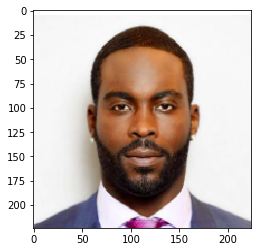

Complete


In [26]:
img=image.load_img('/content/drive/MyDrive/neveda_test/neveda_test/test_example/black.png',target_size=(224,224))
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=1) 
if pred[0][0]>0.5:
  print("Black")
elif pred[0][1]>0.5:
  print("White")
else:
  print("Unknown")

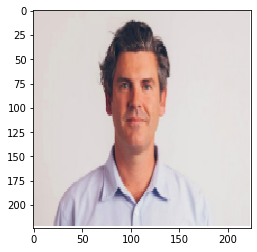

White


In [27]:
img=image.load_img('/content/drive/MyDrive/neveda_test/neveda_test/test_example/white.png',target_size=(224,224))
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=1) 
if pred[0][0]>0.5:
  print("Black")
elif pred[0][1]>0.5:
  print("White")
else:
  print("Unknown")

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import cv2
def colour_type(path,model_path):
  model1=load_model(model_path)
  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  pred=model1.predict(images,batch_size=1) 
  if pred[0][0]>0.5:
    d="Black"
  elif pred[0][1]>0.5:
    d="White"
  else:
    d="Not able to tell"
  return d

In [32]:
path="/content/drive/MyDrive/neveda_test/neveda_test/test_example/black.png"
model_path='/content/drive/MyDrive/test/Data/vgg_model1_good.h5'
colour_type(path,model_path)

'Black'

In [33]:
path="/content/drive/MyDrive/neveda_test/neveda_test/test_example/white.png"
model_path='/content/drive/MyDrive/test/Data/vgg_model1_good.h5'
colour_type(path,model_path)

'White'